In [22]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn import model_selection

$$\text{PCA}$$

In [2]:
def pca(X, n):
    U, s, V = np.linalg.svd(X)
    
    W = V[:n, :].T
    
    Z = X@W
    
    return Z, W

$$\text{Standartization}$$

In [10]:
def standartize(X):
    return (X-X.mean(0))/X.std(0)

$$\text{Euclidean metric}$$

In [20]:
def e_metrics(x, y):    
    return np.sqrt(np.sum(np.square(x-y)))

$$\text{Accuracy}$$

In [19]:
def accuracy(pred, y):
    return (sum(pred == y) / len(y))

$$\text{KNN}$$

In [18]:
class KNN():
    def __init__(self, k = 1, w_type = 'distance', w_name = 'inverse', weighted = False):
        self.k = k
        self.weighted = weighted
        self.w_type = w_type
        self.w_name = w_name
        
    def fit_predict(self, X_train, X_test, y_train):
        answers = np.zeros(X_test.shape[0])
        labels = set(y_train)
        
        for i, x in enumerate(X_test):
            
            test_distances = np.zeros(X_train.shape[0], dtype='object')
            
            for j in range(X_train.shape[0]):
                
                distance = e_metrics(x, X_train[j])
                test_distances[j] = (distance, y_train[j])
                
            classes = {class_label: 0 for class_label in labels}
            neighbours = self.find_neighbours(test_distances)
            if self.weighted:
                weights = self.find_weights(neighbours)                
            else:
                weights = np.ones(len(neighbours))
            for neighbour, w in zip(neighbours, weights):
                    classes[neighbour[1]] += w
 
            answers[i] = sorted(classes, key=classes.get)[-1]
        return answers                
            
    def find_neighbours(self, distances):
        """
        distanaces - list of tuples: [(dist, label), ...]
        """
        z = 0
        for i in range(self.k):
            for j in range(len(distances)-1-z):
                if distances[j][0] < distances[j+1][0]:
                    distances[j], distances[j+1] = distances[j+1], distances[j]
            z += 1
        return distances[-self.k::][::-1]
    
    def find_weights(self, neighbours):
        """
        distances - list of tuples: [(dist, label), ...]
        """
        weights = np.zeros(self.k)
        if self.w_type == 'distance':
            if self.w_name == 'inverse':                
                eps = 1e-15
                for i, neighbour in enumerate(neighbours):
                    weights[i] = 1/(neighbour[0]+eps)
            elif self.w_name == 'geom':
                q = 0.5
                for i, neighbour in enumerate(neighbours):
                    weights[i] = q**neighbour[0]
                
        elif self.w_type == 'ordinal':
            if self.w_name == 'geom':
                q = 0.5
                for i in range(self.k):
                    weights[i] = q**(i+1)
                
            elif self.w_name == 'pos':
                for i in range(self.k):
                    weights[i] = 1/(i+1)           
        return weights

### <b> Task №1, 2

In [23]:
X, y = datasets.load_iris(return_X_y=True)
X_st = standartize(X)

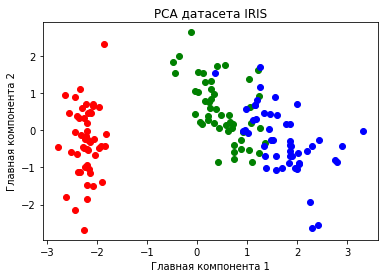

In [25]:
plt.figure()
y = iris.target
for c, i in zip("rgb", [0, 1, 2]):
    plt.scatter(Z[y==i, 0], Z[y==i, 1], c=c)
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.title('PCA датасета IRIS')
plt.show()

### <b> Task №3

In [59]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_st, y, test_size=0.2, random_state=1)
X_pca_train, X_pca_test, y_pca_train, y_pca_test = model_selection.train_test_split(pca(X_st, 2)[0], y, test_size=0.2, random_state=1)

In [61]:
knn_clf = KNN(k=100, w_type = 'ordinal', w_name = 'pos', weighted = True)
knn_pca_clf = KNN(k=100)


y_pred = knn_clf.fit_predict(X_train, X_test, y_train)
y_pca_pred = knn_pca_clf.fit_predict(X_pca_train, X_pca_test, y_train)

accuracy(y_pred, y_test), accuracy(y_pca_pred, y_pca_test)



(1.0, 0.6)